# Assignment 4 Question 2 (20 marks)
## Name: Devon Puchailo
## Student Number: 11201216

The ```a4q2b.csv``` file contains a 6D dataset (each sample has 6 numeric features, one class label, and an index column).  It's too many dimensions to visualize directly.  

We'll try to visualize the data, and build a classifier from it.  Then we'll apply PCA, use the first two principle components for visualization and to train a classifier.  

To complete this question:
1. Produce a scatter plot of any 2 dimensions.  Do you see any natural clusters in 2D?
1. Build a classifier (your choice, e.g., Naive Bayes, KNN, etc) using the 6 features and the label.  Get an estimate of the classifier performance using cross validation.
2. Use Principle Component Analysis to reduce the data to 2 principle components.  (look at the docs: sklearn.decomposition.PCA)
1. Produce a scatter plot of the 2 principle components.  Do you see any natural clusters?
1. Build a classifier (the same type you used above) using the 2 principle components and the label.  Get an estimate of the classifier performance using cross validation.
1. Report on the difference in classifier accuracy.


First some libraries...

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import decomposition

## Producing a scatter plot before reductions

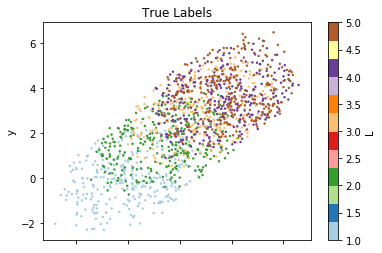

In [17]:
df = pd.read_csv('a4q2b.csv', index_col=0)

#Here we can choose a global colormap, to help visualization
# see https://matplotlib.org/tutorials/colors/colormaps.html
cmapstr = 'Paired'

# here we choose how big each point in the plot will be
ptsize = 2

# plot any 2 of the 6 features, using the given label
df.plot.scatter(x='x', y='y', c='L',colormap=cmapstr,s=ptsize, title='True Labels')

plt.show()

There is definitely no clusters in 2d using x and y as our two features. 
There are obviously no darker points towards the bottom, but there is a lot of mixing-of-classes throughout the plot. 

## Fitting a GaussianNB

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

clf = GaussianNB()

X_df = df[['x', 'y', 'a', 'b', 'c', 'd']]

# just the labels.
L_df = df['L']

clf.fit(X_df, L_df)

#Calculate the error for a 20-fold cross_validation. 
cvs = cross_val_score(clf, X_df, L_df, cv=20)
#Print out the mean average accuracy.
print("Average accuracy over 20-fold cross validation: ", sum(cvs)/20)

Average accuracy over 20-fold cross validation:  0.9133333333333334


## Reducing

Average accuracy over 20-fold cross validation on PCA:  1.0


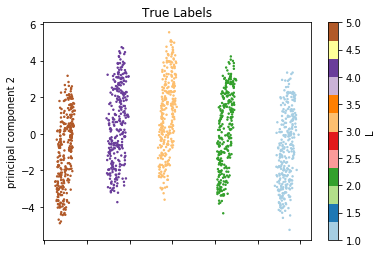

In [19]:
reduced = decomposition.PCA(2)
before_reduction = df[['x', 'y', 'a', 'b', 'c', 'd', 'L']]
components = reduced.fit_transform(before_reduction)

#construct a data frame using the 2 componenets. Need this to plot.
principalDf = pd.DataFrame(data = components, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, L_df], axis = 1)
finalDf.plot.scatter(x='principal component 1', y='principal component 2', c='L',colormap=cmapstr,s=ptsize, title='True Labels')

#Fit the 2 principle components to a Gaussian using L_df. 
clf = GaussianNB()
clf.fit(components, L_df)

#Calculate the error for a 20-fold cross_validation. 
cvs = cross_val_score(clf, components, L_df, cv=20)
#Print out the mean average accuracy.
print("Average accuracy over 20-fold cross validation on PCA: ", sum(cvs)/20)

Accuracy went up a slightly. (91 to 100 %). 
Visual clusters were formed, as can be seen above. 
There was obviously no mixing after PCA was performed. 

From this, we're able to see that PCA can make a good classifier (previous 91% accuracy over 20-fold crass validation) better (100% with 20-fold cross validation). 

The clustering made classification simple. 

## Grading
1. 5 marks: You built a classifier using the whole dataset, and reported an accuracy value.
1. 5 marks: You applied PCA, and visualized the first two principle components.
1. 5 marks: You built a classifier using the first two principle components, and reported an accuracy value.
1. 5 marks: You reported on the difference in accuracy between your two classifiers.